This dataset examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open data source software.

You can get more information on it here: https://insights.stackoverflow.com/survey

## A Look at the data

### Importing lobraries and data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv(r"C:\Users\sousa\Desktop\github\SODeveloperSurvey\Data\survey-results-public.csv", encoding = 'utf-8')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [7]:
#checking rows and columns
n_rows = df.shape[0]
n_cols = df.shape[1]

t.check_rows_cols(n_rows, n_cols) 

Nice job there are 51392 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [8]:
#info on the t.check_rows_cols function
t.check_rows_cols?

In [13]:
#cheking for missing values, get set of column names with no missing values
no_nulls = set(df.columns[~df.isnull().any()])
print(no_nulls)
display.HTML(t.no_null_cols(no_nulls))

{'Professional', 'University', 'ProgramHobby', 'EmploymentStatus', 'Respondent', 'FormalEducation', 'Country'}
Nice job that looks right!


In [14]:
#cheking wich columns have the most missing values, getting a set of column names with more than 75% of the data missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])

t.most_missing_cols(most_missing_cols)

Nice job that looks right!


Text(0.5, 1.0, 'Professional Statuses Counts')

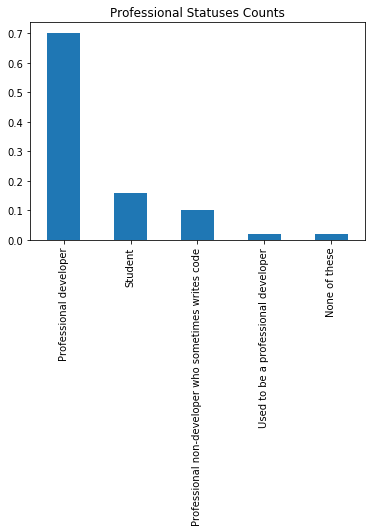

In [25]:
#getting a series of the different professional statuses in the dataset.

#getting total counts for each status
status_vals = df.Professional.value_counts()

#create bar chart for the counts
(status_vals/df.shape[0]).plot(kind = 'bar')
plt.title('Professional Statuses Counts')

Text(0.5, 1.0, 'Formal Education Status')

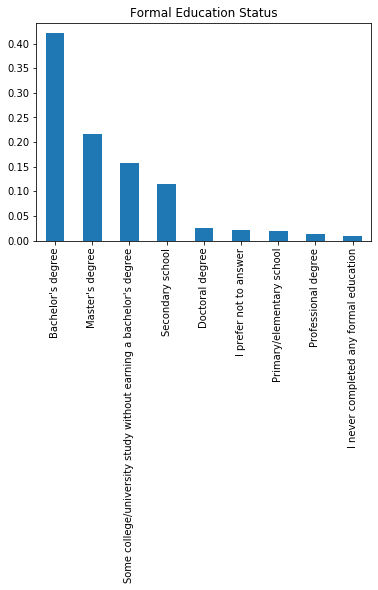

In [26]:
#check different Formal education statuses in a series 
#getting the counts
ed_statuses = df.FormalEducation.value_counts()

#plotting
(ed_statuses/df.shape[0]).plot(kind="bar")
plt.title("Formal Education Status")

Text(0.5, 1.0, 'Country')

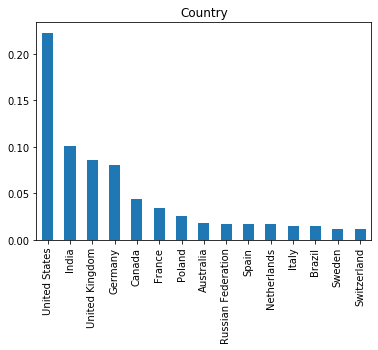

In [27]:
#exploring the different countries of the participants
count_vals = df.Country.value_counts()

#Since there are too many focusing on the top 15
(count_vals[:15]/df.shape[0]).plot(kind="bar")
plt.title("Country")

In [29]:
#loading the second dataset
df2 = pd.read_csv(r"C:\Users\sousa\Desktop\github\SODeveloperSurvey\Data\survey-results-schema.csv")
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [30]:
#Career switches.How to get into the field? check CousinEducation
list(df2[df2.Column == 'CousinEducation']['Question'])

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [31]:
#check the avice given to the participants
study = df['CousinEducation'].value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [32]:
#based on this information I will change the column names to something more significant
study.rename(columns = {'index' : 'method', 'CousinEducation' : 'count'}, inplace = True)
study.head()

,method,count
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [35]:
study.method.unique()

array(['Take online courses; Buy books and work through the exercises',
       'Take online courses', 'None of these',
       'Take online courses; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises',
       'Other',
       'Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Contribute to open source; Buy books and work through the exercises; Conferences/meet-ups',
       'Take online courses; Contribute to open source; Buy books and work through the exercises',
       'Take online courses; Contribute to open source; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Part-time/evening courses; Buy books and work through the exercises; Conferences/meet-ups',
       'Buy books and work through the exercises',
       'Take online c

In [36]:
#creating a list of the individual methods suggested
values_in_method = ['Take online courses', 'Buy books and work through the exercises','None of these', 
                    'Get a job as a QA tester', 'Return to college', 'Participate in online coding competitions',
                   'Part-time/evening courses', 'Contribute to open source', 'Bootcamp', 'Conferences/meet-ups',
                   'Other', 'Participate in hackathons', 'Master\'s degree' ]

In [40]:
#Checking how often each of these individual values appear with the help of a function
def occurence_counts(df, col1, col2, occurence):
    '''
    INPUT: 
    df - pandas df I want to do the search in
    col1 - column I want to look through
    col2 - column I want to count values from
    occurence - list of strings to search for in the df rows
    
    output - novel df with the individual occurence counts
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in occurence:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending = False, inplace = True)
    
    return new_df

In [41]:
study_df = occurence_counts(study, 'method', 'count', values_in_method)
study_df

,method,count
0,Take online courses,15246
1,Buy books and work through the exercises,11750
6,Part-time/evening courses,7517
7,Contribute to open source,7423
8,Bootcamp,5276
9,Conferences/meet-ups,5244
4,Return to college,5017
5,Participate in online coding competitions,3610
3,Get a job as a QA tester,3376
11,Participate in hackathons,2747


In [48]:
#create a new colun with the percentages for each of the methods
study_df['%'] = study_df['count']/np.sum(study_df['count'])*100
study_df

,method,count,%
0,Take online courses,15246,20.943171
1,Buy books and work through the exercises,11750,16.140775
6,Part-time/evening courses,7517,10.325975
7,Contribute to open source,7423,10.196849
8,Bootcamp,5276,7.247551
9,Conferences/meet-ups,5244,7.203594
4,Return to college,5017,6.891768
5,Participate in online coding competitions,3610,4.958996
3,Get a job as a QA tester,3376,4.637554
11,Participate in hackathons,2747,3.773507


In [49]:
#What if we take into account the input of those that are the highest earners? Or the greatest job satisfaction?
def relevant_method(df, col_name, col_mean, occurences):
    '''
    INPUT:
    df - df I want to do the search in
    col_name - col name I want to look through
    col_count - col I want to count values from
    col_mean - col I want the mean from
    occurences - list of strings I want to search for in each row of df[col]
    
    OUTPUT:
    df_all - holds sum, square, total, mean, variations and standard dev
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    for val in occurences:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name][idx] and df[col_mean][idx] > 0:
                new_df[val] += df[col_mean][idx]
                squares_df[val] += df[col_mean][idx]**2
                denoms[val] += 1
                
    #turn into dataframe
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()
    
    #change the column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']
    
    #merge the 2 dataframes
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)
    
    #additional columns to help with the analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total'] - df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    
    return df_all
    

In [53]:
df_all = relevant_method(study, 'CousinEducation', 'Salary', values_in_method)

KeyError: 'CousinEducation'

In [52]:
#now lets sort the results based on the mean
df_all.sort_values('mean_col', ascending = False)

,CousinEducation,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
0,Take online courses,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
1,Buy books and work through the exercises,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
2,None of these,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
3,Get a job as a QA tester,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
4,Return to college,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
5,Participate in online coding competitions,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
6,Part-time/evening courses,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
7,Contribute to open source,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
8,Bootcamp,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
9,Conferences/meet-ups,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
